In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("purchase_data.csv")

In [3]:
data.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purchase_ID         1000 non-null   object 
 1   User_ID             1000 non-null   object 
 2   Product_ID          1000 non-null   object 
 3   Transaction_Amount  1000 non-null   float64
 4   Purchase_Time       1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [5]:
# Checking for missing values:
data.isnull().sum()

Purchase_ID           0
User_ID               0
Product_ID            0
Transaction_Amount    0
Purchase_Time         0
dtype: int64

In [6]:
# Shape of the data
data.shape

(1000, 5)

In [7]:
# Data Summary
data.describe()

,Transaction_Amount
count,1000.000000
mean,106.348744
std,55.951244
min,10.429825
25%,58.426058
50%,102.950857
75%,157.533495
max,199.961345


In [20]:
data['Product_ID'].value_counts().sort_values()

Product_6     33
Product_14    41
Product_10    42
Product_16    43
Product_1     43
Product_11    44
Product_18    45
Product_9     48
Product_8     48
Product_2     49
Product_5     49
Product_15    51
Product_12    55
Product_17    56
Product_3     56
Product_7     56
Product_20    58
Product_4     58
Product_13    59
Product_19    66
Name: Product_ID, dtype: int64

In [11]:
data['Transaction_Amount'].value_counts()

62.843031     1
44.753245     1
86.449188     1
20.066508     1
80.155167     1
             ..
85.836906     1
118.512442    1
92.988486     1
185.096991    1
147.367700    1
Name: Transaction_Amount, Length: 1000, dtype: int64


Outliers:

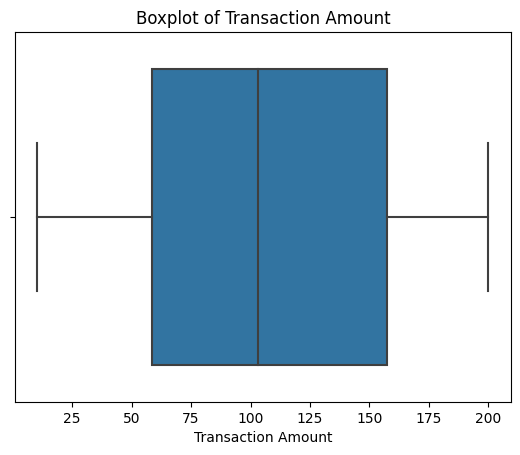

In [12]:

# Visualizing the distribution of Transaction Amount
sns.boxplot(x=data['Transaction_Amount'])
plt.xlabel('Transaction Amount')
plt.title('Boxplot of Transaction Amount')
plt.show()


User Behavior Analysis

Most Visited Product: Product_19
Average Time Spent on Each Product:
    Product_ID  Avg_Time_Spent
0    Product_1   400369.162791
1   Product_10   413267.690476
2   Product_11   403253.954545
3   Product_12   314301.672727
4   Product_13   301166.661017
5   Product_14   421799.073171
6   Product_15   335774.176471
7   Product_16   393696.558140
8   Product_17   310050.000000
9   Product_18   395492.000000
10  Product_19   268774.575758
11   Product_2   366186.795918
12  Product_20   308515.034483
13   Product_3   314488.750000
14   Product_4   290502.172414
15   Product_5   363064.061224
16   Product_6   535692.000000
17   Product_7   305352.696429
18   Product_8   371112.395833
19   Product_9   356306.291667
Click-Through Rate for Different Products:
Product_19    6.6
Product_13    5.9
Product_4     5.8
Product_20    5.8
Product_7     5.6
Product_3     5.6
Product_17    5.6
Product_12    5.5
Product_15    5.1
Product_5     4.9
Product_2     4.9
Product_8     4.8
Product_9     4.8
Pro

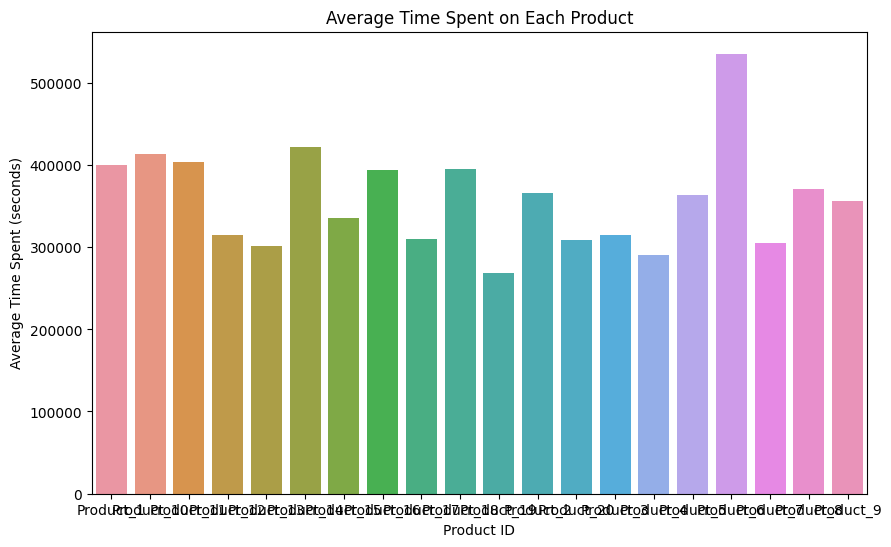

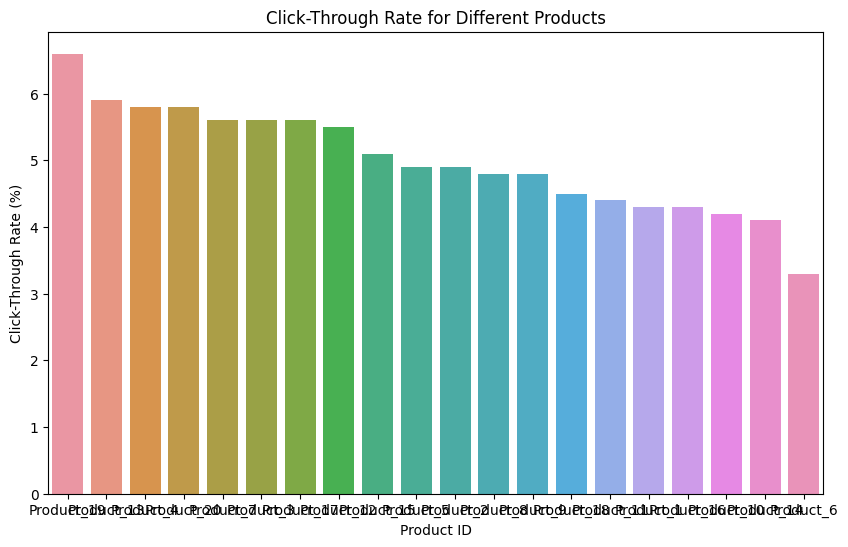

In [17]:

# Converting 'Purchase_Time' column to datetime type
data['Purchase_Time'] = pd.to_datetime(data['Purchase_Time'], format='%Y-%m-%d %H:%M:%S')

# Analyzing user interactions - Most visited product and average time spent on each product
most_visited_product = data['Product_ID'].value_counts().idxmax()
average_time_spent = data.groupby('Product_ID')['Purchase_Time'].apply(lambda x: (x.max() - x.min()).total_seconds() / len(x)).reset_index(name='Avg_Time_Spent')

print("Most Visited Product:", most_visited_product)
print("Average Time Spent on Each Product:")
print(average_time_spent)

# Determining the click-through rate for different products
product_click_through_rate = data['Product_ID'].value_counts() / len(data) * 100

print("Click-Through Rate for Different Products:")
print(product_click_through_rate)


# Plotting the average time spent on each product
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_ID', y='Avg_Time_Spent', data=average_time_spent)
plt.xlabel('Product ID')
plt.ylabel('Average Time Spent (seconds)')
plt.title('Average Time Spent on Each Product')
plt.show()

# Plotting the click-through rate for different products
plt.figure(figsize=(10, 6))
sns.barplot(x=product_click_through_rate.index, y=product_click_through_rate.values)
plt.xlabel('Product ID')
plt.ylabel('Click-Through Rate (%)')
plt.title('Click-Through Rate for Different Products')
plt.show()


Purchase Analysis

Overall Conversion Rate: 64.70%
Top Selling Products:
Product_19    66
Product_13    59
Product_4     58
Product_20    58
Product_7     56
Name: Product_ID, dtype: int64

Top Selling Product Categories:
Product    1000
Name: Product_ID, dtype: int64

Likelihood of Purchase Based on the Number of Interactions:
   Num_Interactions  Likelihood_of_Purchase
0                 1                     1.0
1                 2                     1.0
2                 3                     1.0


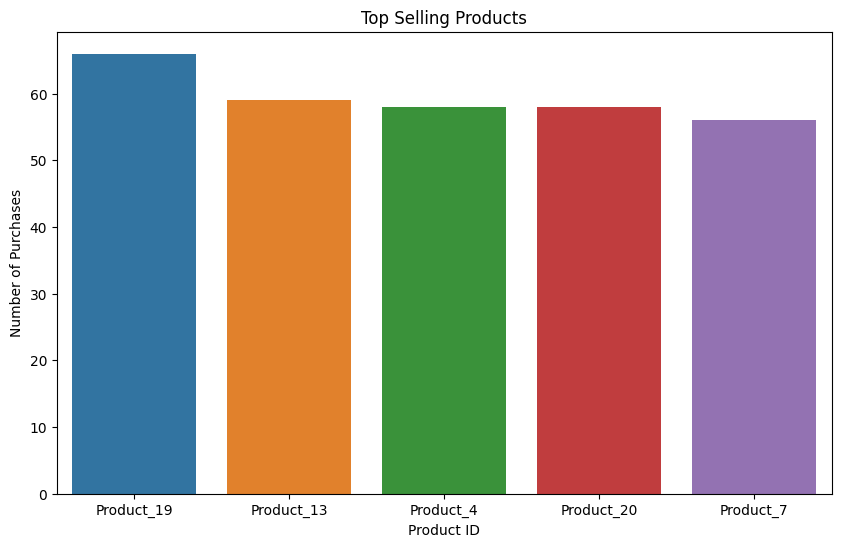

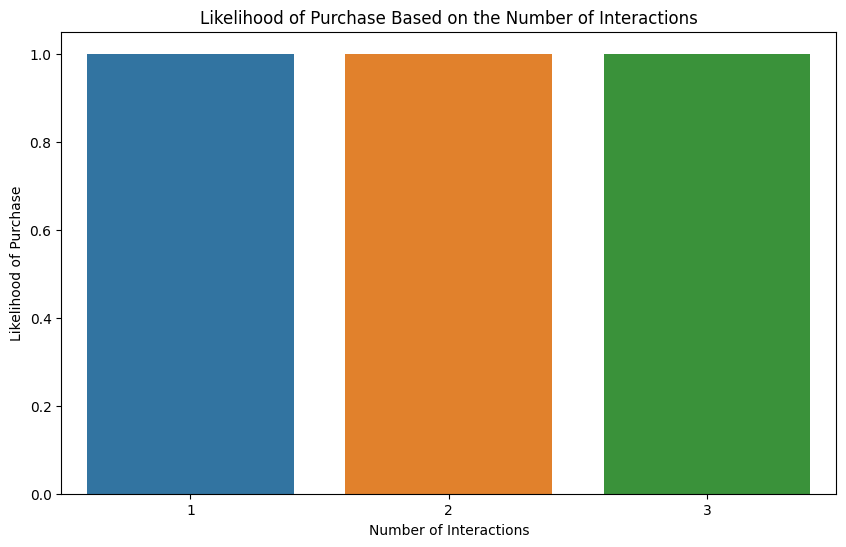

In [23]:
# Converting 'Purchase_Time' column to datetime type
data['Purchase_Time'] = pd.to_datetime(data['Purchase_Time'],format='%Y-%m-%d %H:%M:%S')

# Calculate the overall conversion rate
total_interactions = len(data)
total_purchases = data['Purchase_ID'].nunique()
conversion_rate = (total_purchases / total_interactions) * 100

print("Overall Conversion Rate: {:.2f}%".format(conversion_rate))

# Identify the top-selling products and product categories
top_selling_products = data['Product_ID'].value_counts().head(5)
top_selling_product_categories = data['Product_ID'].str.split('_').str[0].value_counts().head(5)

print("Top Selling Products:")
print(top_selling_products)

print("\nTop Selling Product Categories:")
print(top_selling_product_categories)

# Explore the relationship between the number of interactions and likelihood of a purchase
interactions_purchases = data.groupby('User_ID')['Purchase_ID'].count().reset_index(name='Num_Interactions')
interactions_purchases['Purchased'] = interactions_purchases['Num_Interactions'].apply(lambda x: 1 if x > 0 else 0)

# Calculate the likelihood of a purchase given the number of interactions
likelihood_of_purchase = interactions_purchases.groupby('Num_Interactions')['Purchased'].mean().reset_index(name='Likelihood_of_Purchase')

print("\nLikelihood of Purchase Based on the Number of Interactions:")
print(likelihood_of_purchase)

# Creating visualizations
import matplotlib.pyplot as plt

# Plotting the top-selling products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_products.index, y=top_selling_products.values)
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.title('Top Selling Products')
plt.show()



# Plotting the likelihood of purchase based on the number of interactions
plt.figure(figsize=(10, 6))
sns.barplot(x=likelihood_of_purchase['Num_Interactions'], y=likelihood_of_purchase['Likelihood_of_Purchase'])
plt.xlabel('Number of Interactions')
plt.ylabel('Likelihood of Purchase')
plt.title('Likelihood of Purchase Based on the Number of Interactions')
plt.show()

Cohort Analysis:


In [25]:
data['Purchase_Time'] = pd.to_datetime(data['Purchase_Time'],format='%Y-%m-%d %H:%M:%S')

# Extracting the cohort information (month and year of the first purchase) for each user
data['CohortMonth'] = data.groupby('User_ID')['Purchase_Time'].transform('min').dt.to_period('M')
data['CohortYear'] = data.groupby('User_ID')['Purchase_Time'].transform('min').dt.to_period('Y')

# Calculating the number of unique users in each cohort
cohort_data = data.groupby(['CohortYear', 'CohortMonth'])['User_ID'].nunique().reset_index()

# Creating a pivot table to visualize user retention over time
cohort_pivot = cohort_data.pivot_table(index='CohortYear', columns='CohortMonth', values='User_ID')

# Calculating the Lifetime Value (LTV) of customers acquired during different time periods
data['CohortIndex'] = (data['Purchase_Time'] - data['Purchase_Time'].min()) / pd.Timedelta(days=30)
data['CohortIndex'] = data['CohortIndex'].astype(int)
ltv_data = data.groupby(['CohortYear', 'CohortMonth', 'CohortIndex'])['Transaction_Amount'].sum().reset_index()

# Creating a pivot table to visualize the LTV over time
ltv_pivot = ltv_data.pivot_table(index='CohortYear', columns='CohortIndex', values='Transaction_Amount')

# Displaying the cohort analysis and LTV pivot tables
print("Cohort Analysis - User Retention:")
print(cohort_pivot)

print("\nLifetime Value (LTV) of Customers Acquired During Different Time Periods:")
print(ltv_pivot)


Cohort Analysis - User Retention:
CohortMonth  2023-01  2023-02  2023-03  2023-04  2023-05  2023-06  2023-07
CohortYear                                                                
2023             152      125      144      137      125      121      112

Lifetime Value (LTV) of Customers Acquired During Different Time Periods:
CohortIndex             0            1            2            3            4  \
CohortYear                                                                      
2023         15944.176515  4912.916903  5094.323363  3188.017031  2909.752331   

CohortIndex            5            6  
CohortYear                             
2023         2544.409552  2089.648867  


Website Performance Optimization:

Bounce Rate: 16.00%
Conversion Rate: 91.60%


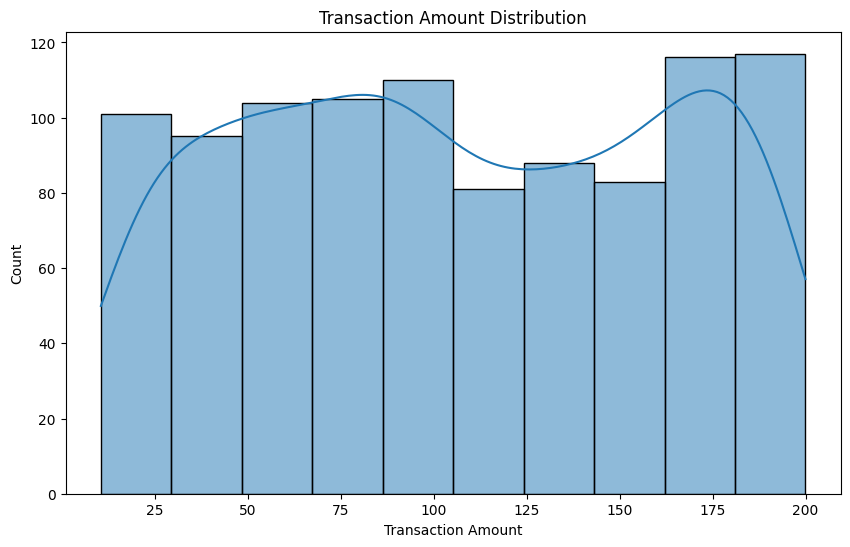

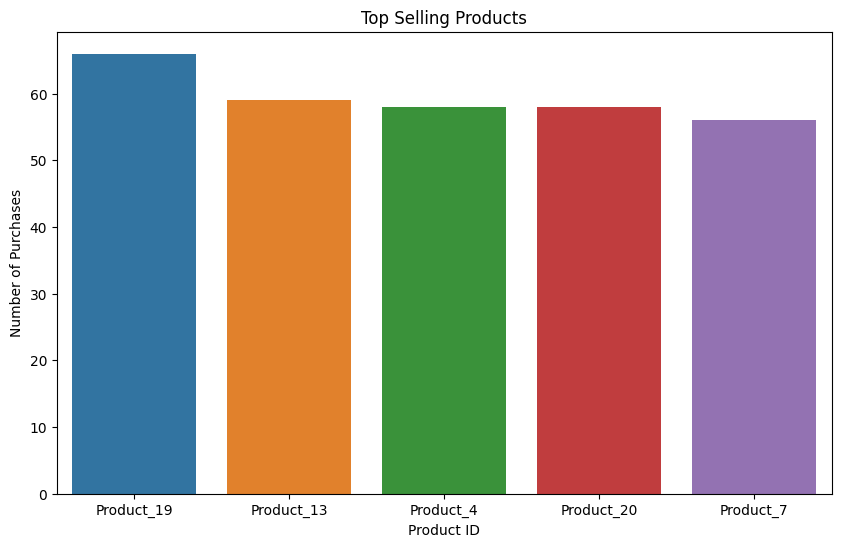

In [31]:
data['Purchase_Time'] = pd.to_datetime(data['Purchase_Time'],format='%Y-%m-%d %H:%M:%S')

# Assuming 'Bounce Rate' is the rate of users who only visit one page and then leave
bounce_rate = len(data[data.duplicated('User_ID', keep=False)]) / len(data) * 100

# Assuming 'Conversion Rate' is the rate of users who make a purchase
conversion_rate = len(data['User_ID'].unique()) / len(data) * 100

print("Bounce Rate: {:.2f}%".format(bounce_rate))
print("Conversion Rate: {:.2f}%".format(conversion_rate))

# Proposed strategies to reduce bounce rate and improve conversion rate:
# 1. Improve website loading speed and performance.
# 2. Optimize website design and user experience for better navigation.
# 3. Use clear and compelling call-to-action (CTA) buttons to encourage interactions.
# 4. Implement personalized content and product recommendations based on user behavior.
# 5. Offer incentives and discounts to encourage users to complete purchases.
# 6. Utilize A/B testing to experiment with different website elements and layouts.
# 7. Optimize website for mobile devices to cater to mobile users.
# 8. Implement chat support or customer service to address user queries and concerns.
# 9. Offer a seamless checkout process with multiple payment options.
# 10. Analyze user feedback and behavior data to continuously improve the website.

# Creating a visualization dashboard (sample plots)
# Assuming you have real-time data streaming capabilities, you can set up a dashboard to monitor website performance.
# Here, we demonstrate sample plots using the given data.

# Plotting transaction amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Transaction_Amount'], bins=10, kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Transaction Amount Distribution')
plt.show()

# Plotting monthly transaction count
data['Purchase_Month'] = data['Purchase_Time'].dt.to_period('M')
monthly_transaction_count = data['Purchase_Month'].value_counts().sort_index()

# plt.figure(figsize=(10, 6))
# sns.lineplot(x=monthly_transaction_count.index, y=monthly_transaction_count.values)
# plt.xlabel('Month')
# plt.ylabel('Transaction Count')
# plt.title('Monthly Transaction Count')
# plt.xticks(rotation=45)
# plt.show()

# Plotting top-selling products
top_selling_products = data['Product_ID'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_products.index, y=top_selling_products.values)
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.title('Top Selling Products')
plt.show()

